# Phase 3: Business EDA & Vendor Performance Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
file_path = "../Notebooks/final_vendor_performance.csv"
df = pd.read_csv(file_path)

In [9]:
df.shape
df.columns
df.head()

,VendorNumber,VendorName_x,total_purchase_qty,total_purchase_cost,avg_unit_cost,total_freight,freight_ratio,VendorName_y,total_sales_qty,total_sales_revenue,avg_sales_price,gross_profit,sales_to_cost_ratio,gross_margin_pct
0,54,AAPER ALCOHOL & CHEMICAL CO,1,105.07,105.070000,0.00,0.000000,0,0.0,0.00,0.000000,-105.07,0.000000,-inf
1,60,ADAMBA IMPORTS INTL INC,708,11461.20,16.218065,54.26,0.004734,ADAMBA IMPORTS INTL INC,416.0,7071.84,16.997937,-4389.36,0.617024,-62.068146
2,105,ALTAMAR BRANDS LLC,72,2496.36,34.751538,17.56,0.007034,ALTAMAR BRANDS LLC,31.0,1429.69,49.190000,-1066.67,0.572710,-74.608482
3,200,AMERICAN SPIRITS EXCHANGE,36,350.28,9.730000,0.63,0.001799,AMERICAN SPIRITS EXCHANGE,2.0,28.98,14.490000,-321.30,0.082734,-1108.695652
4,287,APPOLO VINEYARDS LLC,48,501.72,10.452500,2.04,0.004066,APPOLO VINEYARDS LLC,9.0,139.41,15.490000,-362.31,0.277864,-259.888100


In [11]:
df = df.drop(columns=["VendorName_y"])
df.rename(columns={"VendorName_x": "VendorName"}, inplace=True)

In [13]:
numeric_cols = [
    "total_purchase_qty",
    "total_purchase_cost",
    "avg_unit_cost",
    "total_freight",
    "freight_ratio",
    "total_sales_qty",
    "total_sales_revenue",
    "avg_sales_price",
    "gross_profit",
    "sales_to_cost_ratio",
    "gross_margin_pct"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df.isna().sum()

VendorNumber           0
VendorName             0
total_purchase_qty     0
total_purchase_cost    0
avg_unit_cost          0
total_freight          0
freight_ratio          0
total_sales_qty        0
total_sales_revenue    0
avg_sales_price        0
gross_profit           0
sales_to_cost_ratio    0
gross_margin_pct       0
dtype: int64

# KPI Summary

In [15]:
total_revenue = df["total_sales_revenue"].sum()
total_profit = df["gross_profit"].sum()
active_vendors = df["VendorNumber"].nunique()

print("KPI SUMMARY")
print("-" * 30)
print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Total Gross Profit: ₹{total_profit:,.0f}")
print(f"Active Vendors: {active_vendors}")

KPI SUMMARY
------------------------------
Total Revenue: ₹50,051,276
Total Gross Profit: ₹-3,162,070
Active Vendors: 119


## KPI Interpretation Note

- Although total revenue is ₹50.05M, the overall gross profit is negative (₹-3.16M).
- This indicates that procurement and freight costs exceeded sales revenue for a subset of vendors. 
- Identifying and addressing these loss-making vendors is a key business objective of this analysis.

# Gross Profit Distribution

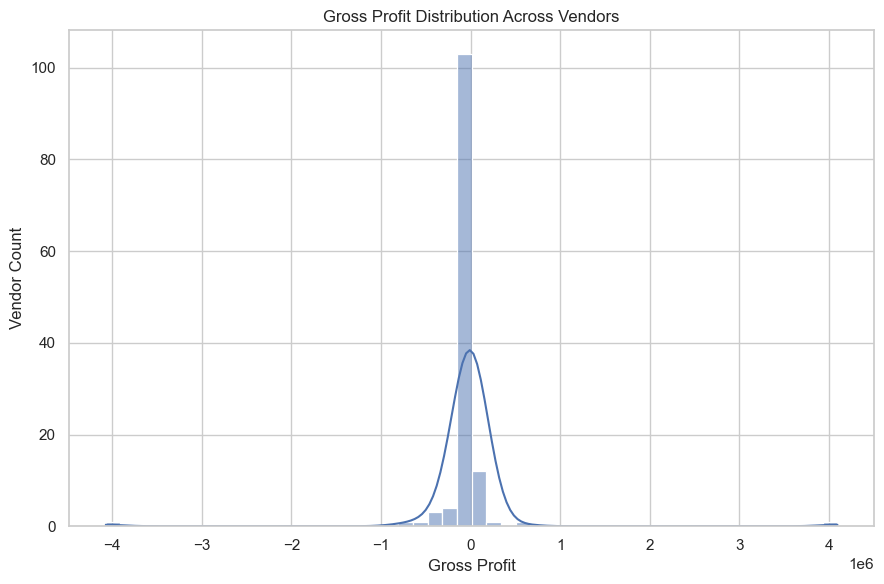

In [17]:
plt.figure(figsize=(9,6))
sns.histplot(df["gross_profit"], bins=50, kde=True)
plt.title("Gross Profit Distribution Across Vendors")
plt.xlabel("Gross Profit")
plt.ylabel("Vendor Count")
plt.tight_layout()
plt.show()

# Top 10 Vendors by Gross Profit

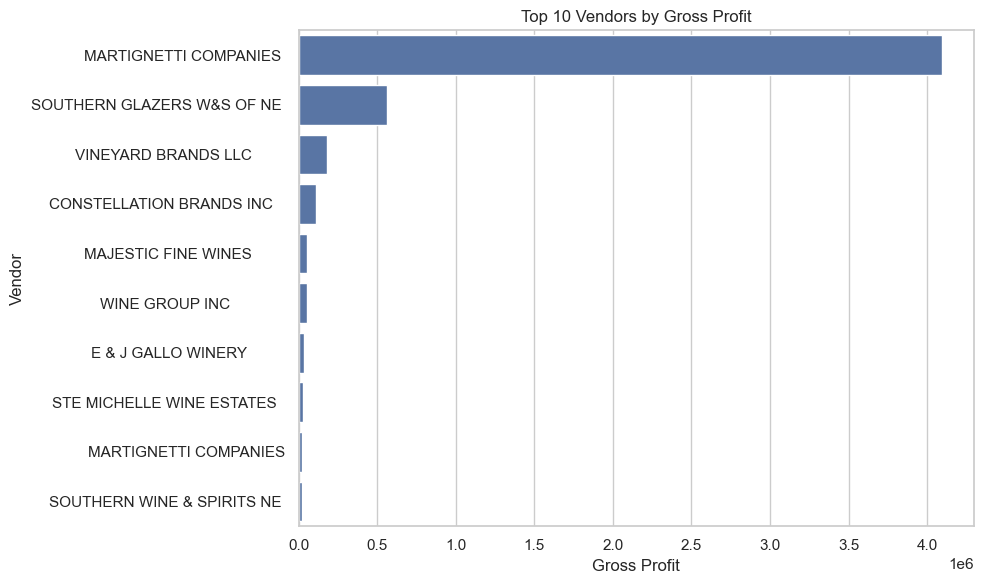

In [19]:
top_profit_vendors = (
    df.sort_values("gross_profit", ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_profit_vendors,
    x="gross_profit",
    y="VendorName"
)

plt.title("Top 10 Vendors by Gross Profit")
plt.xlabel("Gross Profit")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

# Cost vs Profit Efficiency (Scatter Plot)

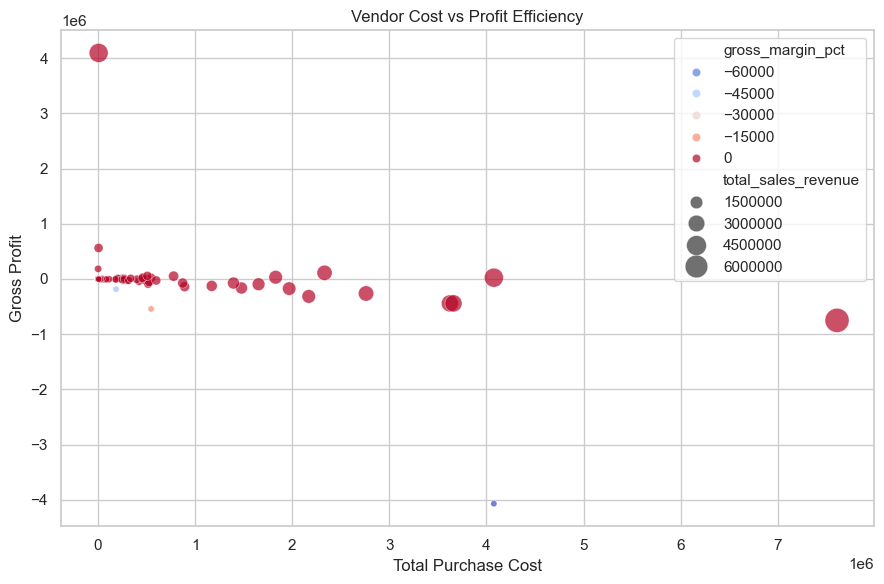

In [31]:
df_clean = df.replace([np.inf, -np.inf], np.nan)

df_clean = df_clean.dropna(
    subset=[
        "total_purchase_cost",
        "gross_profit",
        "gross_margin_pct",
        "total_sales_revenue"
    ]
)

plt.figure(figsize=(9,6))

sns.scatterplot(
    data=df_clean,
    x="total_purchase_cost",
    y="gross_profit",
    size="total_sales_revenue",
    hue="gross_margin_pct",
    palette="coolwarm",
    sizes=(20, 300),
    alpha=0.7
)

plt.title("Vendor Cost vs Profit Efficiency")
plt.xlabel("Total Purchase Cost")
plt.ylabel("Gross Profit")
plt.tight_layout()
plt.show()

# Freight Impact Analysis

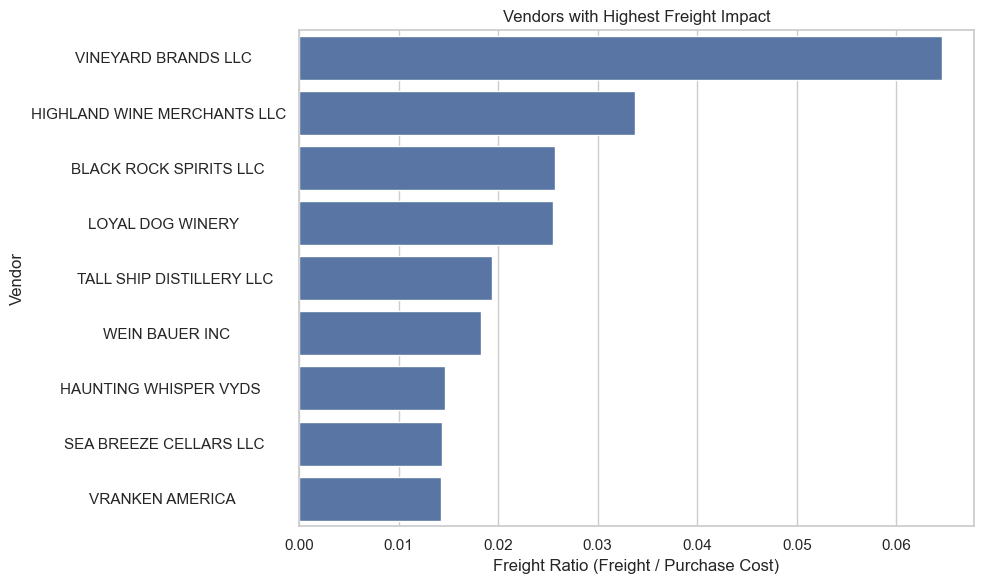

In [23]:
top_freight = (
    df.sort_values("freight_ratio", ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_freight,
    x="freight_ratio",
    y="VendorName"
)

plt.title("Vendors with Highest Freight Impact")
plt.xlabel("Freight Ratio (Freight / Purchase Cost)")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

# Vendor Segmentation by Profit

In [27]:
df["vendor_segment"] = pd.cut(
    df["gross_profit"],
    bins=[-1e9, 0, 5000, 20000, 1e9],
    labels=[
        "Terminate / Review",
        "Low Value Vendor",
        "Growth Potential Vendor",
        "Strategic Vendor"
    ]
)

segment_summary = (
    df.groupby("vendor_segment", observed=True)
      .agg(
          vendor_count=("VendorNumber", "count"),
          total_profit=("gross_profit", "sum")
      )
)

segment_summary

,vendor_count,total_profit
vendor_segment,,
Terminate / Review,91,-8424545.87
Low Value Vendor,20,15398.13
Growth Potential Vendor,7,83882.66
Strategic Vendor,10,5163195.05


# Key Business Insights

# Key Business Insights

- Vendor profitability is highly concentrated among a small set of vendors
- Several vendors incur disproportionately high freight costs
- High purchase cost does not guarantee high profit
- Strategic vendors should be prioritized for long-term partnerships 